In [7]:
# imports
import cv2
import os  # to load the images from a folder
import numpy as np
import matplotlib.pyplot as plt
from helper import convertBlackAndWhite, saveImage, getNumPixels, getNumBlackPixels, getPercentage

In [8]:
os.chdir("/home/maribel/ml-project-2-ml-plume-1/generated/Automatic_Filtering")

In [9]:
def imageIsCorrect(image):
    percentage = getPercentage(image)
    crop_image = image[int(image.shape[0]/2):,:]
    percentage_2 = getPercentage(crop_image)
    plt.imshow(crop_image)
    plt.show()
    correct = True
    if percentage < 54:
        if percentage_2 < 9 or percentage_2 > 37:
            correct = False
            print("Incorrect percentage_2: " + str(percentage_2))
        else:
            print("Correct percentage_2: " + str(percentage_2))
            
    return correct

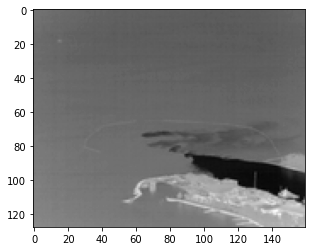

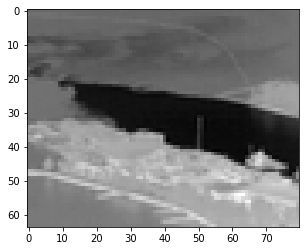

Reference Image Black: 58.45214843749999
Reference Image Crop Black: 54.02343750000001
Refernce Image 
Reference Image Crop 2: 82.75559455901711
Percentage Bad Image: 11.93505923650724
Percentage 1: 42.6416015625
Percentage 2: 1.40625
Image is not correct
Percentage 1: 43.291015625
Percentage 2: 21.81640625
Image is not correct
Percentage 1: 58.45214843749999
Percentage 2: 48.26171875
Image is correct


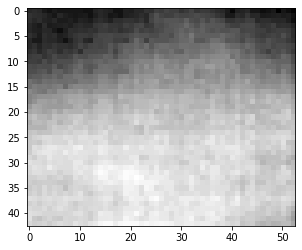

In [6]:
folder = 'Test'
folderSave = 'Results test'

referenceImage = cv2.imread(os.path.join('Test','thermal_2019-07-08_1562608039_0_0.png'), cv2.IMREAD_GRAYSCALE)
crop_referenceImage = referenceImage[int(referenceImage.shape[0]/2):,int(referenceImage.shape[1]/2):]
badImage = cv2.imread(os.path.join('Test','thermal_2020-01-01_1577871615_0_0.png'), cv2.IMREAD_GRAYSCALE)
bad_img_binary = convertBlackAndWhite(badImage)
crop_2_badImage = bad_img_binary[int(badImage.shape[0]/3):int(badImage.shape[0]*2/3), int(badImage.shape[1]/3):int(badImage.shape[1]*2/3)]

plt.imshow(referenceImage, cmap='gray')
plt.show()
plt.imshow(crop_referenceImage, cmap='gray')
plt.show()
plt.imshow(crop_badImage, cmap='gray')

img_binary = convertBlackAndWhite(referenceImage)
img_binary_crop = convertBlackAndWhite(crop_referenceImage)
crop_image_binary = img_binary[int(referenceImage.shape[0]/2):,int(referenceImage.shape[1]/2):]
crop_2_image_binary = img_binary[int(referenceImage.shape[0]/3):int(referenceImage.shape[0]*2/3), int(referenceImage.shape[1]/3):int(referenceImage.shape[1]*2/3)]
referencePercentage = getPercentage(img_binary)
referencePercentage_crop = getPercentage(img_binary_crop)
referenceBlackAndWhiteCrop = getPercentage(crop_image_binary)

referencePercentage_crop_2 = getPercentage(crop_2_image_binary)
badPercentage_crop_2 = getPercentage(crop_2_badImage)

print("Reference Image Black:", referencePercentage)
print("Reference Image Crop Black:", referencePercentage_crop)
print("Refernce Image ")

print("Reference Image Crop 2:", referencePercentage_crop_2)
print("Percentage Bad Image:", badPercentage_crop_2)

tolerance = 5

for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)
        img_binary = convertBlackAndWhite(img)
        img_crop = img[int(img_binary.shape[0]/2):,int(img_binary.shape[1]/2):]
        img_crop_binary = img_binary[int(referenceImage.shape[0]/2):,int(referenceImage.shape[1]/2):]
        percentage_1 = getPercentage(img_binary)
        percentage_2 = getPercentage(img_crop_binary)
        print("Percentage 1:", percentage_1)
        print("Percentage 2:", percentage_2)
         
        if (percentage_2 < (referenceBlackAndWhiteCrop - tolerance) or percentage_2 > (referenceBlackAndWhiteCrop + tolerance)):
            print("Image is not correct")
        else:
            print("Image is correct")